In [17]:
import os
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:

# مسیر اصلی دایرکتوری رو تعریف می‌کنیم
dataset_path = r"E:\Datasets\People Clothing Segmentation"

# مسیر هر پوشه رو مشخص می‌کنیم
jpeg_images_path = os.path.join(dataset_path, "jpeg_images")
jpeg_masks_path = os.path.join(dataset_path, "jpeg_masks")
png_images_path = os.path.join(dataset_path, "png_images")
png_masks_path = os.path.join(dataset_path, "png_masks")

# تعداد فایل‌ها رو تو هر پوشه می‌شماریم
jpeg_images_count = len(os.listdir(jpeg_images_path))
jpeg_masks_count = len(os.listdir(jpeg_masks_path))
png_images_count = len(os.listdir(png_images_path))
png_masks_count = len(os.listdir(png_masks_path))

# نتایج رو چاپ می‌کنیم
print(f"تعداد تصاویر JPEG: {jpeg_images_count}")
print(f"تعداد ماسک‌های JPEG: {jpeg_masks_count}")
print(f"تعداد تصاویر PNG: {png_images_count}")
print(f"تعداد ماسک‌های PNG: {png_masks_count}")

تعداد تصاویر JPEG: 1000
تعداد ماسک‌های JPEG: 1000
تعداد تصاویر PNG: 1000
تعداد ماسک‌های PNG: 1000


In [3]:
image_files = sorted(os.listdir(png_images_path))
mask_files = sorted(os.listdir(png_masks_path))

In [4]:
def load_data(image_path, mask_path):
    # تصویر رو با PIL می‌خونیم و به آرایه numpy تبدیل می‌کنیم
    image = Image.open(os.path.join(image_path, image_files[3])).convert("RGB")
    image = np.array(image)
    
    # ماسک رو می‌خونیم و به آرایه تبدیل می‌کنیم (به grayscale)
    mask = Image.open(os.path.join(mask_path, mask_files[3])).convert("L")
    mask = np.array(mask)
    
    return image, mask

In [5]:
image, mask = load_data(png_images_path,png_masks_path)

In [6]:
print(f"شکل تصویر: {image.shape}")
print(f"شکل ماسک: {mask.shape}")

شکل تصویر: (825, 550, 3)
شکل ماسک: (825, 550)


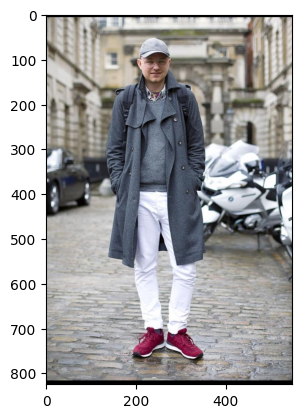

In [7]:
plt.imshow(image)

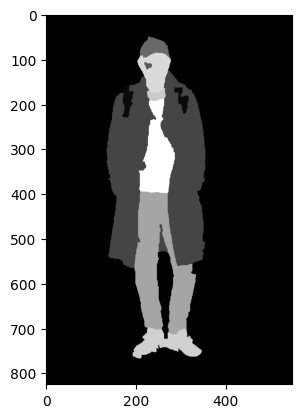

In [13]:
plt.imshow(mask,cmap='gray')

In [11]:
type(mask)

numpy.ndarray

In [12]:
np.unique(mask)

array([ 0,  2, 13, 17, 20, 31, 38, 39, 41, 48], dtype=uint8)

In [14]:
def preprocess_data(image_path, mask_path, target_size=(256, 256)):
    images = []
    masks = []
    
    
    for img_file, mask_file in zip(image_files, mask_files):
       
        image = Image.open(os.path.join(image_path, img_file)).convert("RGB")
        image = image.resize(target_size, Image.Resampling.LANCZOS)
        image = np.array(image)
        image = image / 255.0
        
        
        mask = Image.open(os.path.join(mask_path, mask_file)).convert("L")
        mask = mask.resize(target_size, Image.Resampling.NEAREST)
        mask = np.array(mask)
        
        
        images.append(image)
        masks.append(mask)
    
    
    images = np.array(images)
    masks = np.array(masks)
    
    return images, masks



In [15]:
images, masks = preprocess_data(png_images_path, png_masks_path)

print(f"شکل دیتاست تصاویر: {images.shape}")
print(f"شکل دیتاست ماسک‌ها: {masks.shape}")
print(f"محدوده مقادیر تصویر: {images.min()} تا {images.max()}")
print(f"محدوده مقادیر ماسک: {masks.min()} تا {masks.max()}")

شکل دیتاست تصاویر: (1000, 256, 256, 3)
شکل دیتاست ماسک‌ها: (1000, 256, 256)
محدوده مقادیر تصویر: 0.0 تا 1.0
محدوده مقادیر ماسک: 0 تا 58


In [ ]:
class UNet(nn.module):
    def __init__(in_channels=3,out_channels=59):
        super(UNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels,64,kernel_size=3, padding=1)
        self.conv2 = nn.conv2d(64,64, kernel_size=3, padding=1)
        self.pool = nn.Maxpool2d(kernel_size=2,stride=2)
        self.conv3 = nn.Conv2d(64,128,kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(128,128,kernel_size=3,padding=1)
        self.conv5 = nn.Conv2d(128,256,kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(256,256, kernel_size=3,padding=1)

        
        